# Neural Logic Gates Implementation

In [982]:
import numpy as np
from itertools import product

## Step Activation Function

In [983]:
def step(x):
    """Step activation function"""
    return 1 if x >= 0 else 0

## Basic Neuron Implementation

In [984]:
def neuron(x, w, b):
    """Simple neuron with step activation"""
    return step(x @ w + b)

## Basic Logic Gates

In [985]:
def and_p(x):
    """AND gate implementation"""
    n = neuron(x, np.array([1, 1]), -2)
    return n

def or_p(x):
    """OR gate implementation"""
    n = neuron(x, np.array([1, 1]), -1)
    return n

## XOR Gate Implementations

Two different implementations of XOR gate using neural networks:

In [986]:
def xor1_p(x):
    """XOR gate implementation - Method 1"""
    n1 = neuron(x, np.array([1, -1]), -1)
    n2 = neuron(x, np.array([-1, 1]), -1)
    n3 = neuron(np.array([n1, n2]), np.array([1, 1]), -1)
    return n3

def xor2_p(x):
    """XOR gate implementation - Method 2"""
    n1 = or_p(x)
    n2 = neuron(x, np.array([-1, -1]), 1)
    n3 = and_p(np.array([n1, n2]))
    return n3

## Complex Boolean Function

Implementation of a more complex boolean function using multiple neurons:
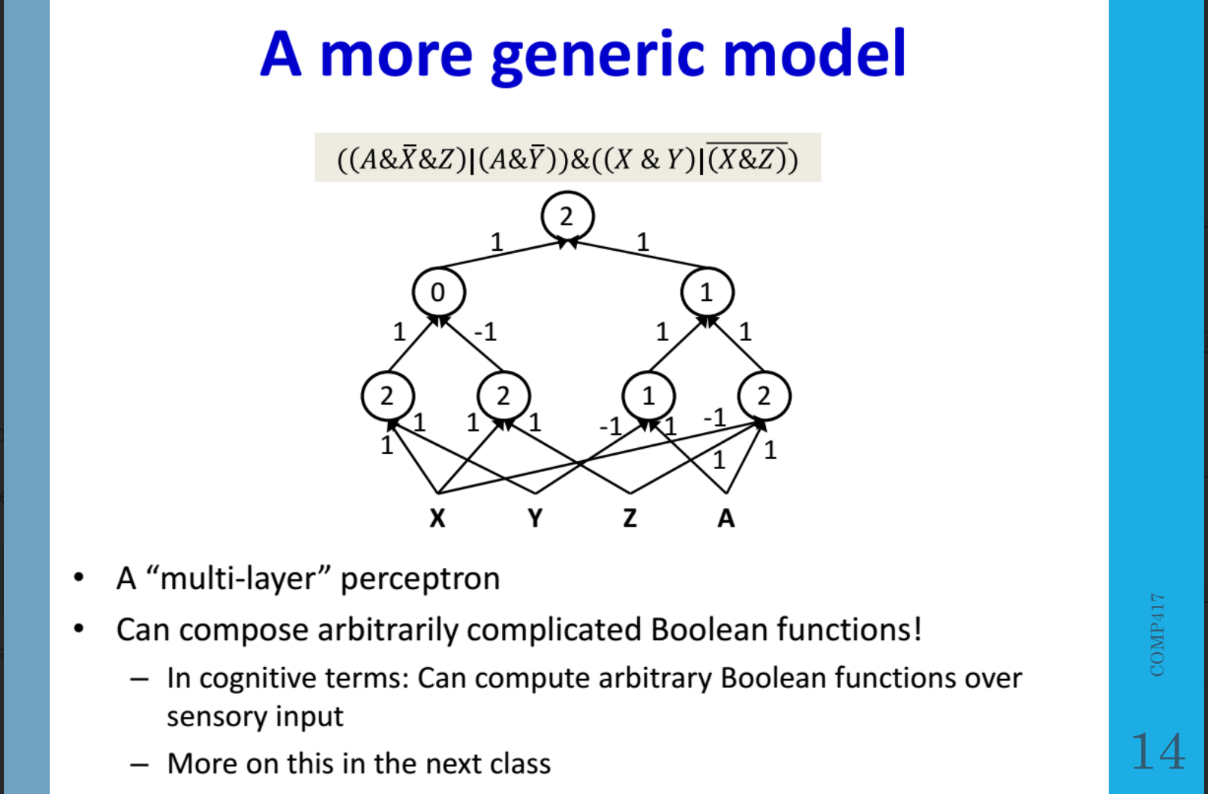

In [987]:
def bf_mlp(x):
    """Multi-layer perceptron for complex boolean function"""
    n1 = neuron(x[[0, 1, 3]], np.array([1, -1, 1]), -2)
    n2 = neuron(x[[0, 2]], np.array([1, -1]), -1)
    n3 = neuron(x[[1, 2]], np.array([1, 1]), -2)
    n4 = neuron(x[[1, 3]], np.array([1, 1]), -2)
    n5 = or_p(np.array([n1, n2]))
    n6 = neuron(np.array([n3, n4]), np.array([1, -1]), 0)
    n7 = and_p(np.array([n5, n6]))
    return n7

def bf_exp(x):
    """Explicit boolean function implementation"""
    return ((x[0] and not x[1] and x[3]) or (x[0] and not x[2])) and ((x[1] and x[2]) or not (x[1] and x[3]))

## Test All Possible Input Combinations

In [988]:
# Generate all possible input combinations for 4 binary variables
x = [
    [a, x, y, z] for a in range(2) for x in range(2) for y in range(2) for z in range(2)
]
x = np.array(x)

print("(A, X, Y, Z)\tMLP Output\tExplicit Output")
print("-" * 45)
for e in x:
    mlp_result = bf_mlp(e)
    exp_result = bool(bf_exp(e))
    print(f"{e}\t{mlp_result}\t\t{exp_result}")

(A, X, Y, Z)	MLP Output	Explicit Output
---------------------------------------------
[0 0 0 0]	0		False
[0 0 0 1]	0		False
[0 0 1 0]	0		False
[0 0 1 1]	0		False
[0 1 0 0]	0		False
[0 1 0 1]	0		False
[0 1 1 0]	0		False
[0 1 1 1]	0		False
[1 0 0 0]	1		True
[1 0 0 1]	1		True
[1 0 1 0]	0		False
[1 0 1 1]	1		True
[1 1 0 0]	1		True
[1 1 0 1]	0		False
[1 1 1 0]	0		False
[1 1 1 1]	0		False


## Test Basic Logic Gates

In [989]:
print("\nTesting Basic Logic Gates:")
print("AND Gate:")
for i in range(2):
    for j in range(2):
        inputs = np.array([i, j])
        print(f"AND({i}, {j}) = {and_p(inputs)}")

print("\nOR Gate:")
for i in range(2):
    for j in range(2):
        inputs = np.array([i, j])
        print(f"OR({i}, {j}) = {or_p(inputs)}")

print("\nXOR Gate (Method 1):")
for i in range(2):
    for j in range(2):
        inputs = np.array([i, j])
        print(f"XOR({i}, {j}) = {xor1_p(inputs)}")

print("\nXOR Gate (Method 2):")
for i in range(2):
    for j in range(2):
        inputs = np.array([i, j])
        print(f"XOR({i}, {j}) = {xor2_p(inputs)}")


Testing Basic Logic Gates:
AND Gate:
AND(0, 0) = 0
AND(0, 1) = 0
AND(1, 0) = 0
AND(1, 1) = 1

OR Gate:
OR(0, 0) = 0
OR(0, 1) = 1
OR(1, 0) = 1
OR(1, 1) = 1

XOR Gate (Method 1):
XOR(0, 0) = 0
XOR(0, 1) = 1
XOR(1, 0) = 1
XOR(1, 1) = 0

XOR Gate (Method 2):
XOR(0, 0) = 0
XOR(0, 1) = 1
XOR(1, 0) = 1
XOR(1, 1) = 0


### Implementing a **generalized AND perceptron** capable of handling both positive and negated input literals.

In [990]:
def general_and(x):
    # x: dict of {var_name: (value, is_positive)}
    values = []
    weights = []
    L = 0

    for _, (val, is_positive) in x.items():
        w = 1 if is_positive else -1
        weights.append(w)
        values.append(val)  # this should be 0 or 1
        if is_positive:
            L += 1

    x_vec = np.array(values)
    w_vec = np.array(weights)

    # bias must be based on number of positive literals
    bias = -L

    return neuron(x_vec, w_vec, bias)

In [991]:
# Variable order we will use: ["x", "y", "z"]

print("x y z | perceptron expected")
print("--------------------------")

for x_val, y_val, z_val in product([0, 1], repeat=3):
    # prepare dict: (value, is_positive)
    # x and y are positive literals, z is negated
    inputs = {
        "x": (x_val, True),
        "y": (y_val, True),
        "z": (z_val, False),
    }

    percep_out = general_and(inputs)
    expected = int((x_val) and (y_val) and not (z_val))  # expected output

    print(f"{x_val} {y_val} {z_val} |    {percep_out}       {expected}")

x y z | perceptron expected
--------------------------
0 0 0 |    0       0
0 0 1 |    0       0
0 1 0 |    0       0
0 1 1 |    0       0
1 0 0 |    0       0
1 0 1 |    0       0
1 1 0 |    1       1
1 1 1 |    0       0


### Implementing a **generalized OR perceptron** capable of handling both positive and negated input literals.

In [992]:
def general_or(x):
    # x: dict of {var_name: (value, is_positive)}
    values = []
    weights = []
    L = 0  # Positive literals count

    for _, (val, is_positive) in x.items():
        w = 1 if is_positive else -1
        weights.append(w)
        values.append(val)  # this should be 0 or 1
        if is_positive:
            L += 1

    x_vec = np.array(values)
    w_vec = np.array(weights)

    # bias must be based on number of positive literals - Total inputs + 1
    bias = -(L - x_vec.size + 1)

    return neuron(x_vec, w_vec, bias)

In [993]:
print("x y z | perceptron expected")
print("--------------------------")

for x_val, y_val, z_val in product([0, 1], repeat=3):
    # prepare dict: (value, is_positive)
    # x and y are positive literals, z is negated
    inputs = {
        "x": (x_val, True),
        "y": (y_val, True),
        "z": (z_val, False),
    }

    percep_out = general_or(inputs)
    expected = int((x_val) or (y_val) or not (z_val))  # expected output

    print(f"{x_val} {y_val} {z_val} |    {percep_out}       {expected}")

x y z | perceptron expected
--------------------------
0 0 0 |    1       1
0 0 1 |    0       0
0 1 0 |    1       1
0 1 1 |    1       1
1 0 0 |    1       1
1 0 1 |    1       1
1 1 0 |    1       1
1 1 1 |    1       1


### Implementing the generalized AND with general distinct weights (Must refer to negated variables with negative weights).

In [ ]:
def general_and_v2(x):
    # x: dict of {var_name: (value, is_positive)}
    # weights: list or array of same length as x
    values = []
    weights = []

    for _, (val, weight) in x.items():
        values.append(val)
        weights.append(weight)

    x_vec = np.array(values)
    w_vec = np.array(weights)
    
    # bias = negative sum of positive weights
    pos_mask = w_vec > 0
    bias = -np.sum(w_vec[pos_mask])

    return neuron(x_vec, w_vec, bias)
  

In [995]:
print("a x y z | perceptron expected")
print("--------------------------")

weights = [-0.3, 0.8, -0.9, 0.9]
for a_val, x_val, y_val, z_val in product([0, 1], repeat=4):
    # prepare dict: (value, is_positive)
    # x and z are positive literals. a, y is negated
    inputs = {
        "a": (a_val, weights[0]),
        "x": (x_val, weights[1]),
        "y": (y_val, weights[2]),
        "z": (z_val, weights[3]),
    }

    percep_out = general_and_v2(inputs)
    expected = int(not (a_val) and (x_val) and not (y_val) and (z_val))  # expected output

    print(f"{a_val} {x_val} {y_val} {z_val} |    {percep_out}       {expected}")

a x y z | perceptron expected
--------------------------
0 0 0 0 |    0       0
0 0 0 1 |    0       0
0 0 1 0 |    0       0
0 0 1 1 |    0       0
0 1 0 0 |    0       0
0 1 0 1 |    1       1
0 1 1 0 |    0       0
0 1 1 1 |    0       0
1 0 0 0 |    0       0
1 0 0 1 |    0       0
1 0 1 0 |    0       0
1 0 1 1 |    0       0
1 1 0 0 |    0       0
1 1 0 1 |    0       0
1 1 1 0 |    0       0
1 1 1 1 |    0       0


### Generalized OR with distinct weights can be implemented via training the preceptron. there is no clear guideline as to how to make it have a dynamic bias. On paper you can use the eq: Sum(Wi.Xi) + b >= 0.